In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [42]:
df_energy=pd.read_csv("energy.csv",dtype=str)
df_solar=df_energy.loc[df_energy['Description']=="Solar Energy Consumption"]
df_solar['YYYYMM']=df_solar['YYYYMM'].str.slice(stop=4)
df_solar.head()

C:\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MSN,YYYYMM,Value,Column_Order,Description,Unit
3110,SOTCBUS,1949,Not Available,6,Solar Energy Consumption,Trillion Btu
3111,SOTCBUS,1950,Not Available,6,Solar Energy Consumption,Trillion Btu
3112,SOTCBUS,1951,Not Available,6,Solar Energy Consumption,Trillion Btu
3113,SOTCBUS,1952,Not Available,6,Solar Energy Consumption,Trillion Btu
3114,SOTCBUS,1953,Not Available,6,Solar Energy Consumption,Trillion Btu


In [43]:
df_solar['YYYYMM']=pd.to_numeric(df_solar['YYYYMM'])
bins=[0,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2018]
group_names=['1950','1955','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015','2018']
df_solar["New column"]=pd.cut(df_solar['YYYYMM'],bins,labels=group_names)
df_solar=df_solar.loc[df_energy["Value"]!='Not Available']
df_solar['Value']=pd.to_numeric(df_solar['Value'])

C:\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


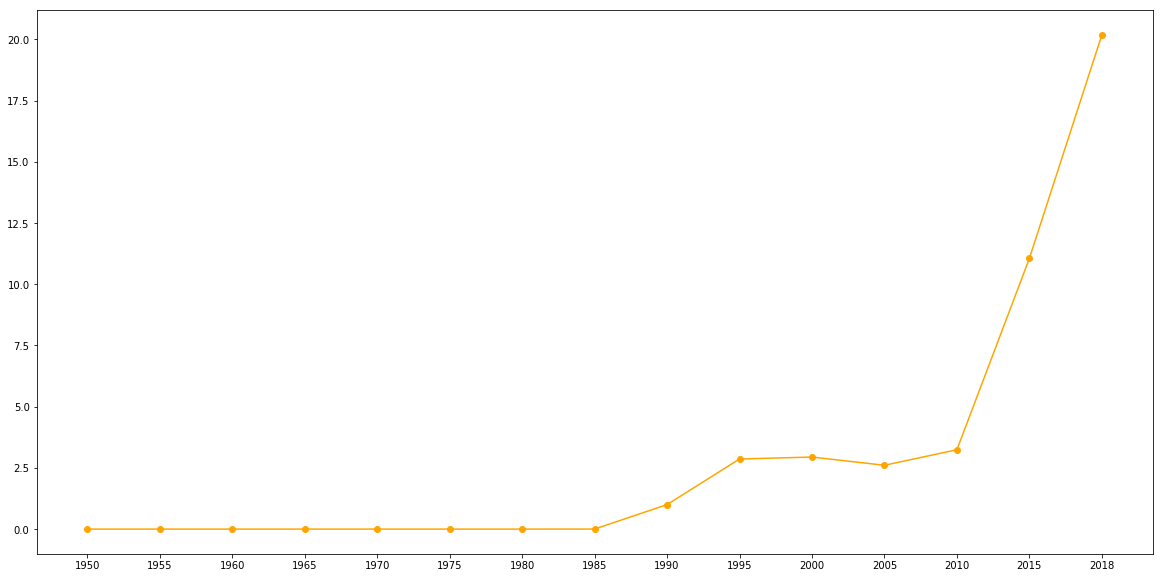

In [44]:
df_axis1=df_solar.groupby('New column')['Value'].sum()
df_axis1.reset_index()
solar,=plt.plot(group_names,df_axis1/df_axis1.loc['1990'],marker='o',color='orange',label="Solar Energy Consumed")
plt.rcParams['figure.figsize']=(20,10)
plt.savefig('Solar Energy Consumed.png')

In [45]:
df_energy=pd.read_csv("energy.csv",dtype=str)
df_wind=df_energy.loc[df_energy['Description']=="Wind Energy Consumption"]
df_wind["YYYYMM"]=df_energy['YYYYMM']=df_energy['YYYYMM'].str.slice(stop=4)
df_wind['YYYYMM']=pd.to_numeric(df_wind['YYYYMM'])
df_wind=df_wind.loc[df_wind["Value"]!='Not Available']
df_wind['Value']=pd.to_numeric(df_wind['Value'])

C:\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


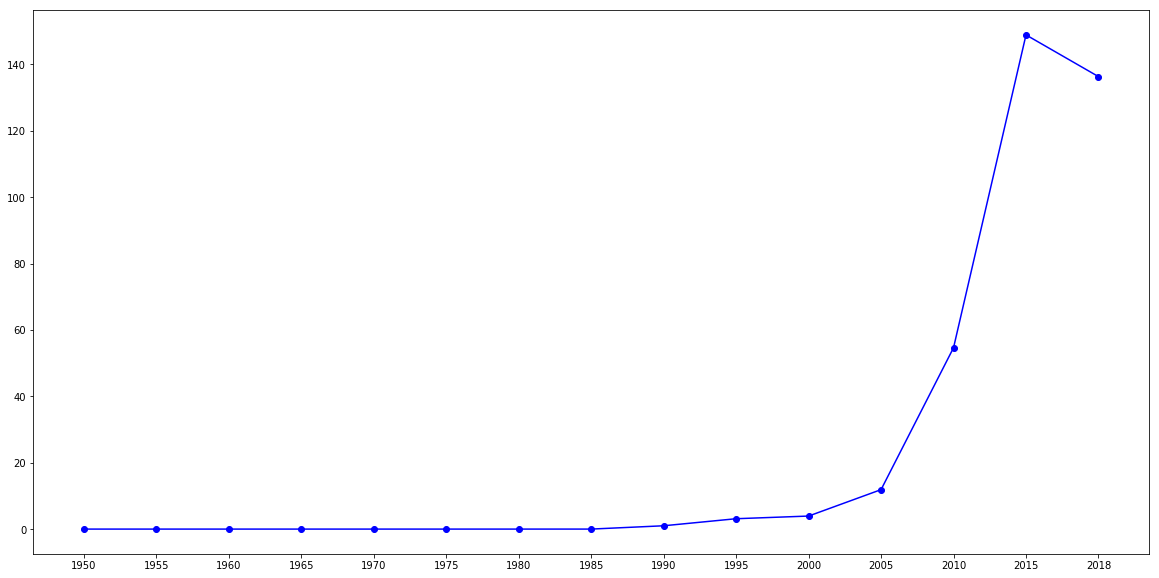

In [46]:
df_wind["New column"]=pd.cut(df_wind['YYYYMM'],bins,labels=group_names)
df_axis2=df_wind.groupby('New column')['Value'].sum()/10
df_axis2.reset_index()
wind,=plt.plot(group_names,df_axis2/df_axis2.loc['1990'],marker='o',color='blue',label="Wind Energy Consumption")
plt.rcParams['figure.figsize']=(20,10)

In [47]:

df_Petroenergy=pd.read_csv("Petro Energy.csv",dtype=str)
df_Petroenergy=df_Petroenergy.loc[df_Petroenergy['Description']=="Total Petroleum Consumed by the Residential Sector"]
df_Petroenergy["YYYYMM"]=df_Petroenergy['YYYYMM'].str.slice(stop=4)
df_Petroenergy['YYYYMM']=pd.to_numeric(df_Petroenergy['YYYYMM'])
df_Petroenergy['Value']=pd.to_numeric(df_Petroenergy['Value'])
df_Petroenergy["New column"]=pd.cut(df_Petroenergy['YYYYMM'],bins,labels=group_names)


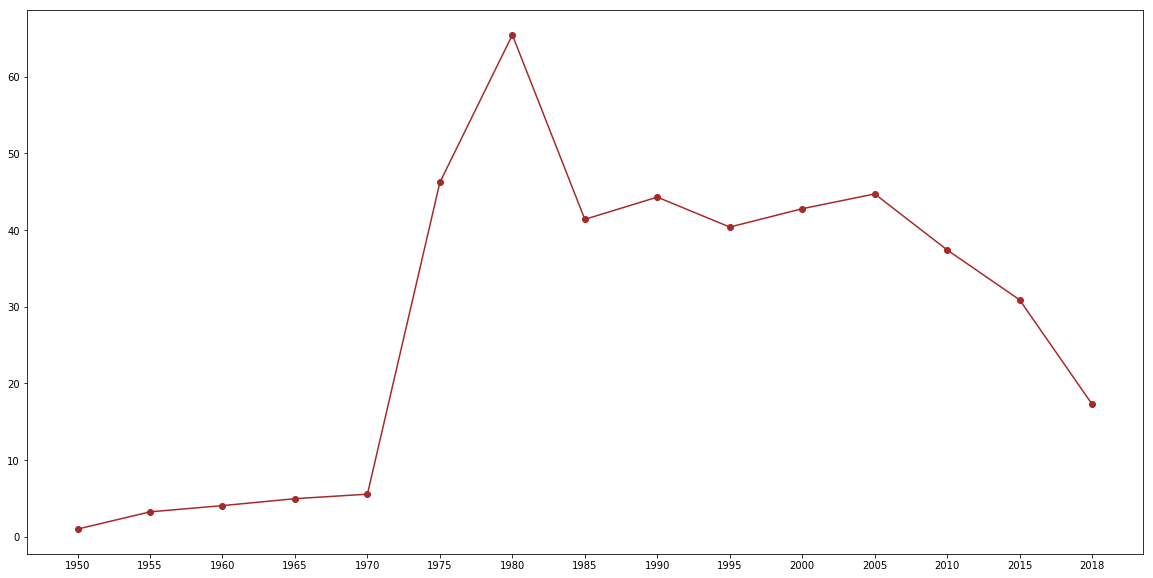

In [48]:
df_axis3=df_Petroenergy.groupby('New column')['Value'].sum()/10
df_axis3.reset_index()
petro,=plt.plot(group_names,df_axis3/df_axis3.iloc[0],marker='o',color='brown',label="Total Petroleum Consumed")
plt.rcParams['figure.figsize']=(20,10)

In [49]:
df_coal=pd.read_csv("Coal Energy.csv",dtype=str)
df_coal=df_coal.loc[df_coal['Description']=="Coal Production"]
df_coal["YYYYMM"]=df_coal['YYYYMM'].str.slice(stop=4)
df_coal['YYYYMM']=pd.to_numeric(df_coal['YYYYMM'])
df_coal['Value']=pd.to_numeric(df_coal['Value'])
df_coal["New column"]=pd.cut(df_coal['YYYYMM'],bins,labels=group_names)

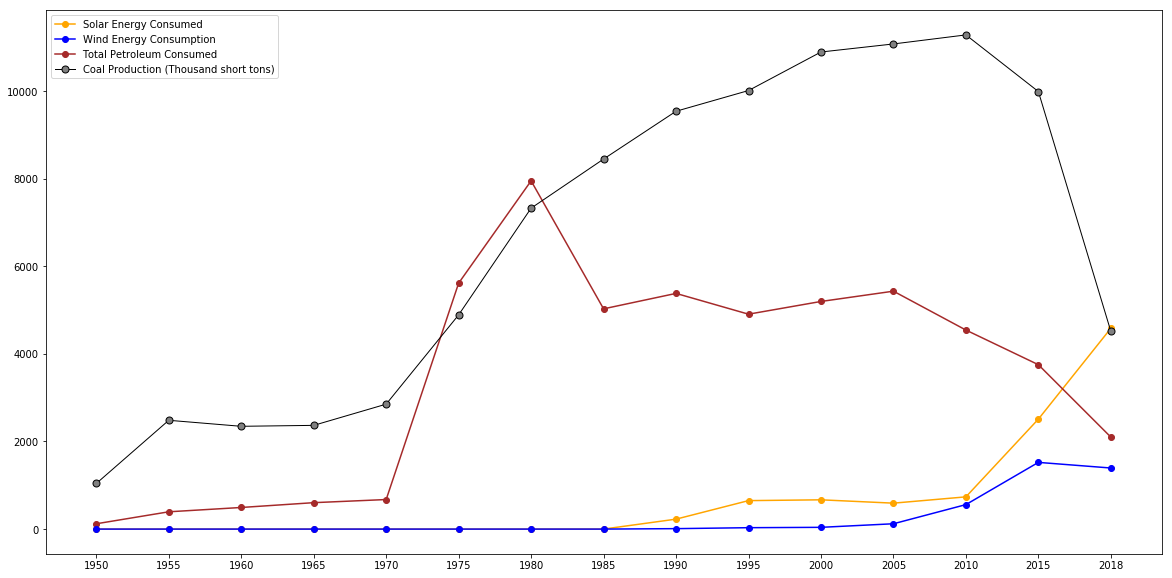

In [50]:
df_axis4=df_coal.groupby('New column')['Value'].sum()/1000
df_axis4.reset_index()

solar,=plt.plot(group_names,df_axis1,marker='o',color='orange',label="Solar Energy Consumed")
petro,=plt.plot(group_names,df_axis3,marker='o',color='brown',label="Total Petroleum Consumed")
wind,=plt.plot(group_names,df_axis2,marker='o',color='blue',label="Wind Energy Consumption")
coal,=plt.plot(group_names,df_axis4, marker='o', markerfacecolor='grey', markersize=7, color='black', linewidth=1,label="Coal Production (Thousand short tons)")

plt.legend(handles=[solar, wind,petro,coal], loc="best")
plt.rcParams['figure.figsize']=(20,10)
plt.savefig("Energy Sources.png")
